# 📊 Part 1: Load and Explore the Dataset

### 1️⃣ Read the Data and Initial Exploration

| Column     | Description                                            |
| ---------- | ------------------------------------------------------ |
| `age`      | Age of the person                                      |
| `sex`      | Gender of the person (male/female)                     |
| `bmi`      | Body Mass Index (a measure of body fat)                |
| `children` | Number of children covered by health insurance         |
| `smoker`   | Whether the person smokes (yes/no)                     |
| `region`   | Region in the US (northeast, southeast, etc.)          |
| `charges`  | **Target**: Medical costs billed by insurance (in USD) |
🧐 Goal: Predict charges (medical cost) based on the other features.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Yahea/Workshop 2/lecture 3/insurance.csv')

# Display the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2️⃣ Encode Categorical Columns

In [ ]:
# Encode 'sex' and 'smoker' (yes/no) to 1/0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Encode 'region' using simple mapping
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

# Check the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 3️⃣ Check Info and Summary Statistics

In [ ]:
# Data info
df.info()

# Numerical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


### 4️⃣ Split the Data (Train, Validation, Test)

In [ ]:
from sklearn.model_selection import train_test_split

# First split into train+val and test
train_val, test = train_test_split(df, test_size=0.2, random_state=42)

# Then split train+val into train and val
train, val = train_test_split(train_val, test_size=0.2, random_state=42)

# Check sizes
print(f"Train shape: {train.shape}")
print(f"Validation shape: {val.shape}")
print(f"Test shape: {test.shape}")

Train shape: (856, 7)
Validation shape: (214, 7)
Test shape: (268, 7)


# 📊 Part 2: EDA (Exploratory Data Analysis)

### 5️⃣ Target Variable: Distribution of Charges

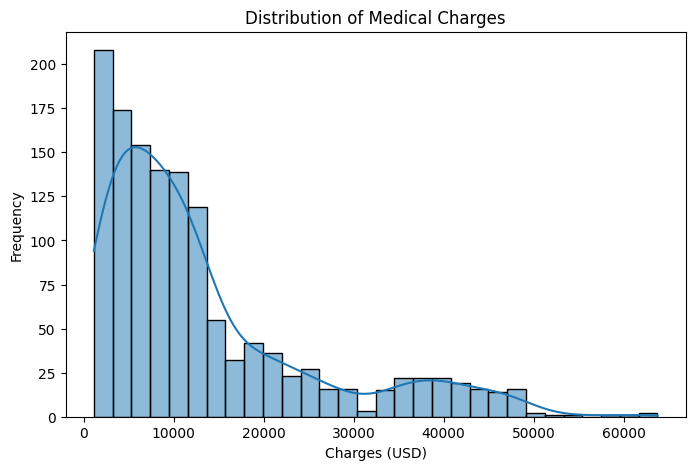

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.show()

### 6️⃣ Relationship: Target vs. Other Features

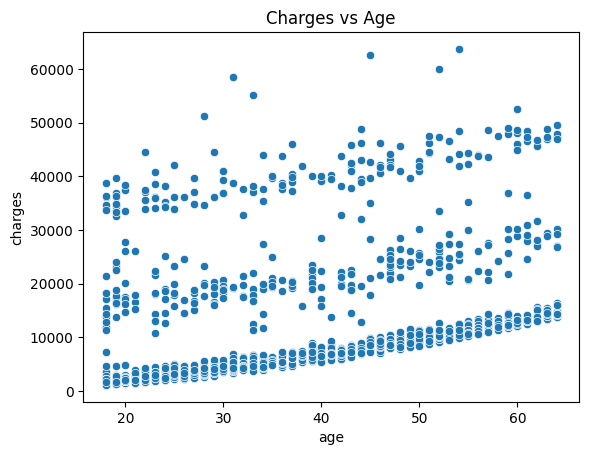

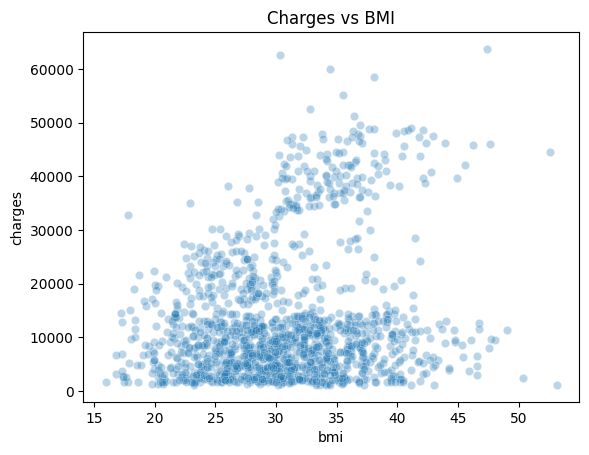

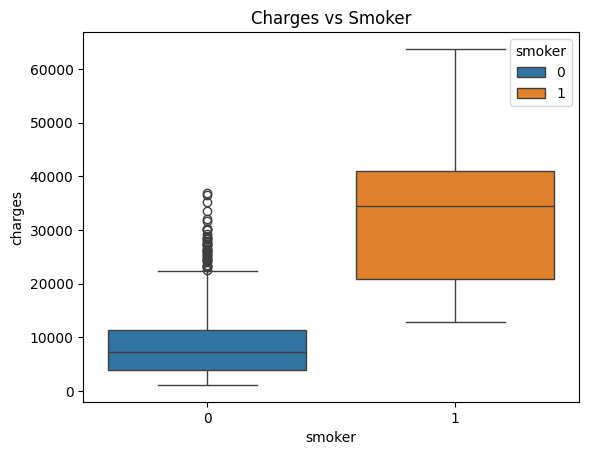

In [ ]:
# Charges vs Age
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Charges vs Age')
plt.show()

# Charges vs BMI
sns.scatterplot(data=df, x='bmi', y='charges', alpha=.3)
plt.title('Charges vs BMI')
plt.show()

# Charges vs Smoker
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker')
plt.title('Charges vs Smoker')
plt.show()

### 7️⃣ 🧩 Heatmap Question for Students

📌 Question:
What is the linear correlation between the target variable (charges) and the other features? Show it as a heatmap.

### 8️⃣ Feature-wise EDA

In [ ]:
# Uniqueness and counts
for col in df.columns:
    print(f"\n=== {col.upper()} ===")
    print("Unique values:", df[col].nunique())
    print("Value counts:")
    print(df[col].value_counts())


=== AGE ===
Unique values: 47
Value counts:
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

=== SEX ===
Unique values: 2
Value counts:
sex
1    676
0    662
Name: count, dtype: int64

=== BMI ===
Unique values: 548
Value counts:
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

=== CHILDREN ===
Unique values: 6
Value counts:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

=== SMOKER ===
Unique values: 2
Value c

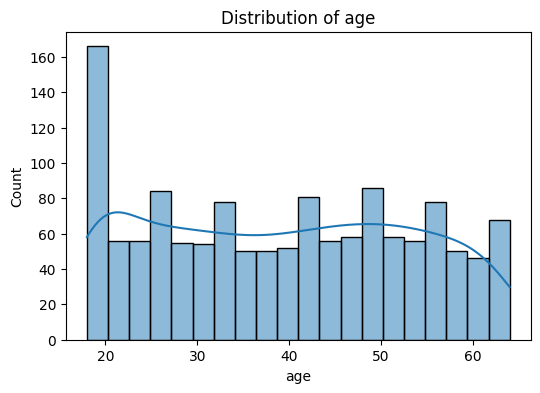

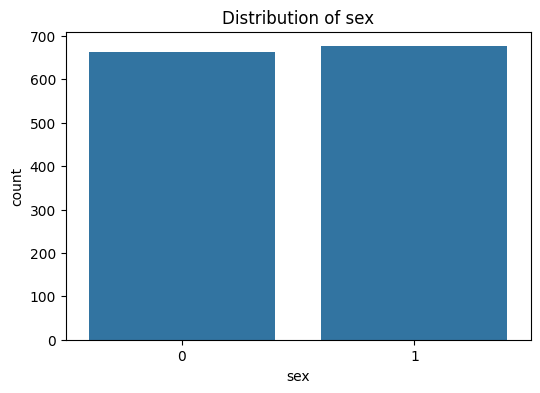

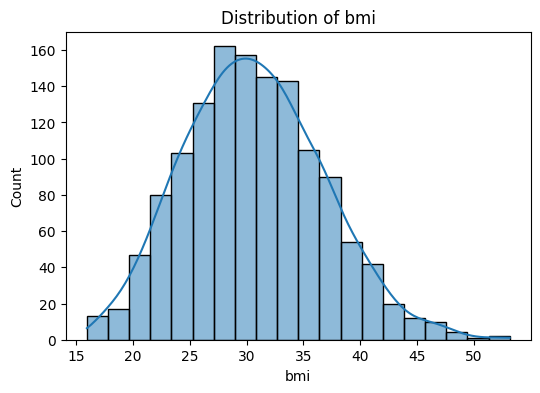

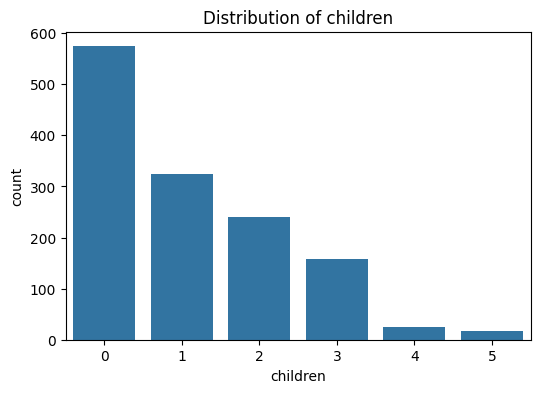

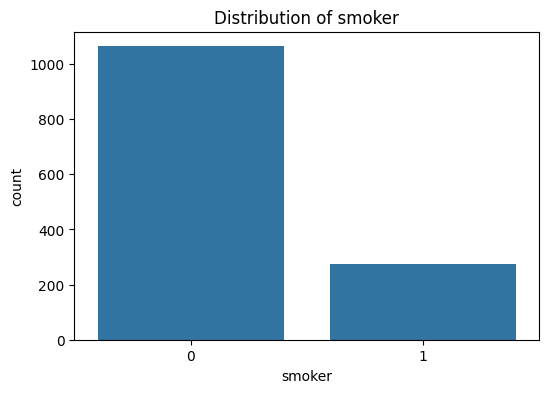

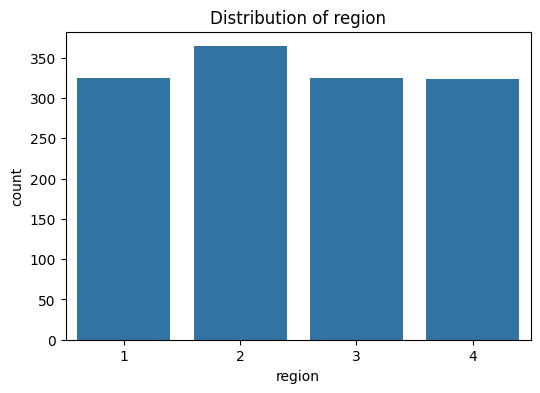

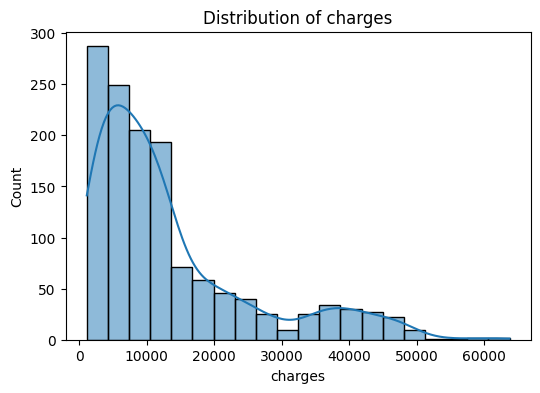

In [ ]:
# For each feature, plot histogram (if numeric) or bar chart (if categorical)
for col in df.columns:
    plt.figure(figsize=(6,4))
    if df[col].nunique() <= 10:
        sns.countplot(data=df, x=col)
    else:
        sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 94 to 880
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       856 non-null    int64  
 1   sex       856 non-null    int64  
 2   bmi       856 non-null    float64
 3   children  856 non-null    int64  
 4   smoker    856 non-null    int64  
 5   region    856 non-null    int64  
 6   charges   856 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 53.5 KB


# 📊 Part 3: Data Check, Feature Engineering, and Scaling

### 1️⃣ Check for Missing Data & Categorical Features

In [ ]:
# Check for missing values
print("Missing values in Train:\n", train.isnull().sum())
print("\nMissing values in Validation:\n", val.isnull().sum())
print("\nMissing values in Test:\n", test.isnull().sum())

# Check data types
print("\nData types in Train:\n", train.dtypes)

Missing values in Train:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values in Validation:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values in Test:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types in Train:
 age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


### 2️⃣ Create New Features

Let’s add 2 simple features for educational purposes:

* bmi_per_age: BMI divided by age
* children_squared: Number of children squared

In [ ]:
for df_ in [train, val, test]:
    df_['bmi_per_age'] = df_['bmi'] / df_['age']
    df_['children_squared'] = df_['children'] ** 2

# Quick check
train.head()

,age,sex,bmi,children,smoker,region,charges,bmi_per_age,children_squared
94,64,0,31.30,2,1,1,47291.0550,0.489063,4
814,36,1,34.43,2,0,2,5584.3057,0.956389,4
246,60,0,38.06,0,0,2,12648.7034,0.634333,0
794,39,0,31.92,2,0,3,7209.4918,0.818462,4
1239,25,0,42.13,1,0,2,3238.4357,1.685200,1


# 🧠 Part 4: Modeling - Linear vs Non-Linear Regression

### 1️⃣ Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Separate features and target
X_train = train.drop('charges', axis=1)
y_train = train['charges']
X_val = val.drop('charges', axis=1)
y_val = val['charges']

# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
train_pred_lr = lr.predict(X_train)
val_pred_lr = lr.predict(X_val)

# Evaluate
mae_train_lr = mean_absolute_error(y_train, train_pred_lr)
mae_val_lr = mean_absolute_error(y_val, val_pred_lr)

print(f"Linear Regression MAE on Train: {mae_train_lr:.4f}")
print(f"Linear Regression MAE on Validation: {mae_val_lr:.4f}")

# Compare with target mean, min, max
print(f"\nTarget (charges) mean: {train['charges'].mean():.2f}")
print(f"Target (charges) min: {train['charges'].min():.2f}")
print(f"Target (charges) max: {train['charges'].max():.2f}")

# Thetas (coefficients)
print("\nLinear Regression Coefficients:")
print("Theta 0 (intercept):", lr.intercept_)

for idx, (feature, coef) in enumerate(zip(X_train.columns, lr.coef_), start=1):
    print(f"Theta {idx} ({feature}): {coef:.4f}")

Linear Regression MAE on Train: 4077.3122
Linear Regression MAE on Validation: 4429.9703

Target (charges) mean: 13185.57
Target (charges) min: 1121.87
Target (charges) max: 62592.87

Linear Regression Coefficients:
Theta 0 (intercept): -16443.231716152593
Theta 1 (age): 342.9688
Theta 2 (sex): -141.6733
Theta 3 (bmi): 226.2867
Theta 4 (children): 1016.0926
Theta 5 (smoker): 23487.6243
Theta 6 (region): 219.1478
Theta 7 (bmi_per_age): 3547.3151
Theta 8 (children_squared): -161.3569


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Select one sample from the test set (original scale)
sample = test.drop('charges', axis=1).iloc[0]
true_charge = test['charges'].iloc[0]

# Manual prediction using thetas (linear model)
manual_pred = lr.intercept_ + np.sum(sample.values * lr.coef_)

# Model prediction using .predict()
sample_df = pd.DataFrame([sample.values], columns=X_train.columns)
model_pred = lr.predict(sample_df)[0]

# Print the results for this sample
print(f"True target value (normalized charges): {true_charge:.4f}")
print(f"Manual prediction using thetas: {manual_pred:.4f}")
print(f"Prediction using model.predict(): {model_pred:.4f}")

# Calculate MAE on the full test set
X_test = test.drop('charges', axis=1)
y_test = test['charges']
test_pred = lr.predict(X_test)

mae_test = mean_absolute_error(y_test, test_pred)
print(f"\nLinear Regression MAE on Test Set: {mae_test:.4f}")

True target value (normalized charges): 9095.0683
Manual prediction using thetas: 8935.0076
Prediction using model.predict(): 8935.0076

Linear Regression MAE on Test Set: 4121.1171


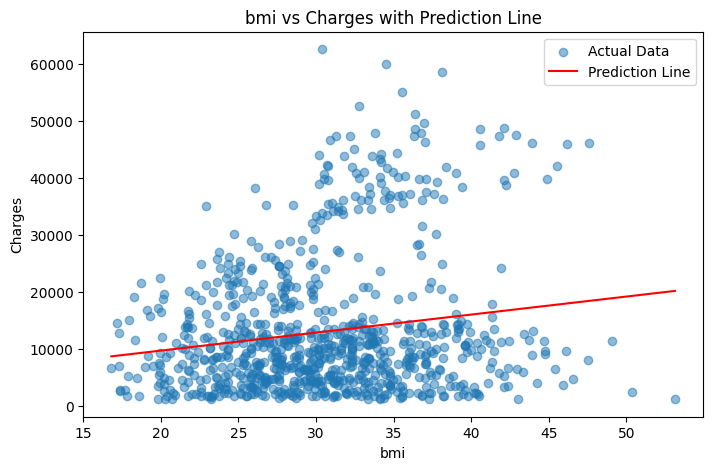

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Choose feature for plotting
feature = 'bmi'

# Original feature and target
x = train[feature]
y = train['charges']

# Scatter plot of actual data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label='Actual Data')

# Create BMI range for prediction (original scale)
feature_range = np.linspace(x.min(), x.max(), 300)

# Create DataFrame for predictions (other features at mean)
X_line = train.drop('charges', axis=1).mean().to_frame().T
X_line = pd.concat([X_line] * 300, ignore_index=True)
X_line[feature] = feature_range

# Add new features (bmi_per_age, children_squared)
X_line['bmi_per_age'] = X_line['bmi'] / X_line['age']
X_line['children_squared'] = X_line['children'] ** 2

# Ensure column order matches X_train
X_line = X_line[X_train.columns]

# Predict using model
y_pred_line = lr.predict(X_line)

# Plot the prediction line
plt.plot(feature_range, y_pred_line, color='red', label='Prediction Line')

# Final plot settings
plt.title(f'{feature} vs Charges with Prediction Line')
plt.xlabel(feature)
plt.ylabel('Charges')
plt.legend()
plt.show()

### 2️⃣ Train and Evaluate Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Train Decision Tree
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Try higher max_depth for more complexity
dt.fit(X_train, train['charges'])

# Predictions
train_pred_dt = dt.predict(X_train)
val_pred_dt = dt.predict(val.drop('charges', axis=1))

# Evaluate MAE
mae_train_dt = mean_absolute_error(train['charges'], train_pred_dt)
mae_val_dt = mean_absolute_error(val['charges'], val_pred_dt)

print(f"Decision Tree MAE on Train: {mae_train_dt:.4f}")
print(f"Decision Tree MAE on Validation: {mae_val_dt:.4f}")

# MAE on Test Set
X_test = test.drop('charges', axis=1)
y_test = test['charges']
test_pred_dt = dt.predict(X_test)
mae_test_dt = mean_absolute_error(y_test, test_pred_dt)
print(f"Decision Tree MAE on Test Set: {mae_test_dt:.4f}")

Decision Tree MAE on Train: 336.0027
Decision Tree MAE on Validation: 3261.7894
Decision Tree MAE on Test Set: 2984.1441


In [ ]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Select one sample from the test set
sample = test.drop('charges', axis=1).iloc[0]
true_charge = test['charges'].iloc[0]

# Make sure sample has the right feature names and order
sample_df = pd.DataFrame([sample.values], columns=X_train.columns)

# Model prediction
model_pred_dt = dt.predict(sample_df)[0]

# Print the results
print(f"\nTrue target value (charges): {true_charge:.4f}")
print(f"Prediction using Decision Tree .predict(): {model_pred_dt:.4f}")

# Calculate and print MAE on full test set
X_test = test.drop('charges', axis=1)
y_test = test['charges']
test_pred_dt = dt.predict(X_test)

mae_test_dt = mean_absolute_error(y_test, test_pred_dt)
print(f"\nDecision Tree MAE on Test Set: {mae_test_dt:.4f}")


True target value (charges): 9095.0683
Prediction using Decision Tree .predict(): 8453.1795

Decision Tree MAE on Test Set: 2984.1441


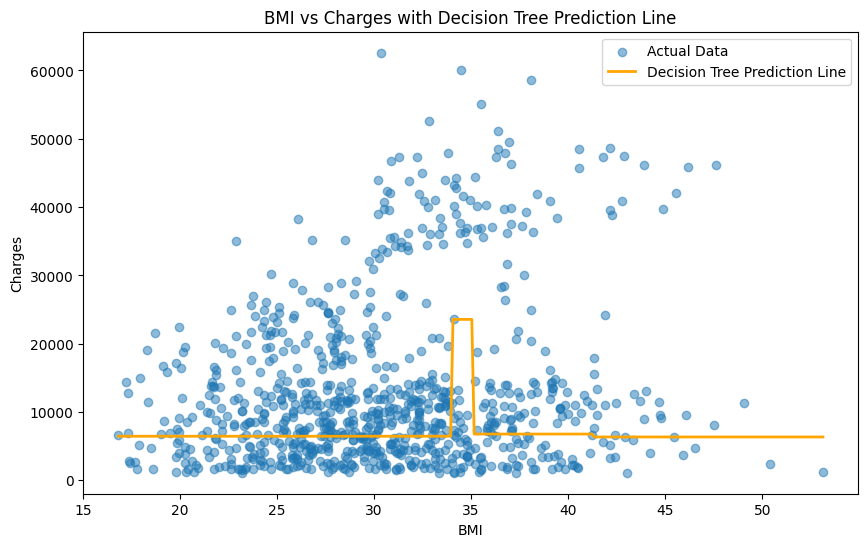

In [ ]:
# 1️⃣ Scatter plot of actual data
x_bmi = train['bmi']
y_charges = train['charges']

plt.figure(figsize=(10, 6))
plt.scatter(x_bmi, y_charges, alpha=0.5, label='Actual Data')

# 2️⃣ Create BMI range for prediction
bmi_range = np.linspace(x_bmi.min(), x_bmi.max(), 300)

# 3️⃣ Create DataFrame for predictions (other features at mean)
X_line = train.drop('charges', axis=1).mean().to_frame().T
X_line = pd.concat([X_line] * 300, ignore_index=True)
X_line['bmi'] = bmi_range

# 4️⃣ Add new features (bmi_per_age, children_squared)
X_line['bmi_per_age'] = X_line['bmi'] / X_line['age']
X_line['children_squared'] = X_line['children'] ** 2

# 5️⃣ Ensure column order
X_line = X_line[X_train.columns]

# 6️⃣ Predict using Decision Tree
y_pred_line_dt = dt.predict(X_line)

# 7️⃣ Plot prediction line
plt.plot(bmi_range, y_pred_line_dt, color='orange', label='Decision Tree Prediction Line', linewidth=2)

# Final touches
plt.title('BMI vs Charges with Decision Tree Prediction Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()